# Pymaceuticals Inc.
---

### Analysis

- Ramicane has lower tumor volume mean, median, variance, standard deviation, and SEM when compared to Capomulin.
- There is a strong positive correlation between mouse weight and the average tumor volume. The heavier the mouse, the bigger the tumor will most likely be
 
--- 

## Prepare the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate values dataframe
duplicates_df = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# How many different mice have duplicates?
duplicates_df["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mask_g989 = (combined_df["Mouse ID"] == "g989")
g989_df = combined_df.loc[mask_g989,:]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask_no_g989 = (combined_df["Mouse ID"] != "g989")
cleaned_df = combined_df.loc[mask_no_g989,:]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_df = cleaned_df.groupby(by="Drug Regimen").agg({
    "Tumor Volume (mm3)": [np.mean,np.median,np.var,np.std,st.sem]
})
tumor_df.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

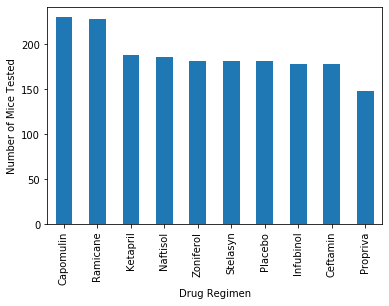

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count_df = cleaned_df.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)
drug_regimen_count_df.plot(kind="bar").set_ylabel("Number of Mice Tested")
plt.show()


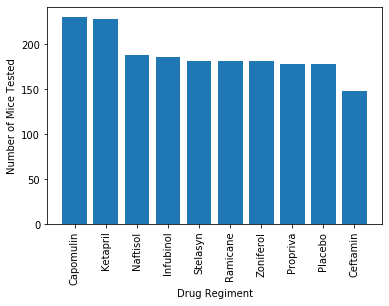

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = cleaned_df["Drug Regimen"].unique()
number_mice = cleaned_df.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)
plt.bar(drug_regimen,number_mice)
plt.xticks(rotation=90)
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice Tested")
plt.show()

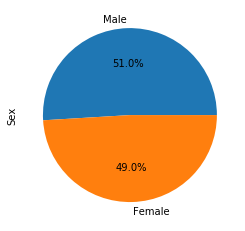

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = cleaned_df.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False).rename("Sex")
sex_df.plot(kind="pie",autopct="%1.1f%%")
plt.show()

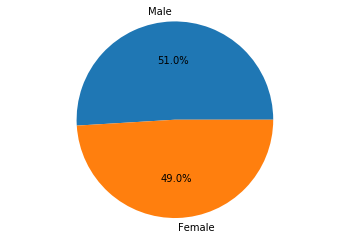

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = cleaned_df["Sex"].value_counts().reset_index()
sex.columns = ["Sex", "Count"]
plt.pie(sex["Count"], labels=sex["Sex"], autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby("Mouse ID").max()["Timepoint"].reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint_df, cleaned_df, how="inner", on=["Mouse ID", "Timepoint"])
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == treatment),:]
    treatment_tumor_vol = treatment_df["Tumor Volume (mm3)"]
    
    # Calculate iqr, and upper/lower bounds
    quartiles = treatment_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_df.loc[(treatment_df["Tumor Volume (mm3)"] < lower_bound) | (treatment_df["Tumor Volume (mm3)"] > upper_bound),"Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_data.append(treatment_tumor_vol.tolist())
    
    # Print outliers if any
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


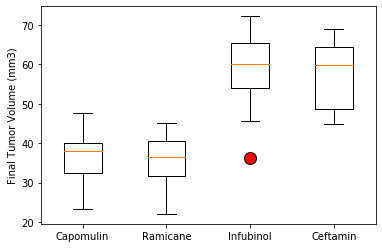

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# set flier (outlier) styling property
flierprops = dict(marker='o',markerfacecolor="r",markeredgecolor="black",markersize=12)

# Use subplots to plot all 4 boxplots, run in list of lists.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, flierprops=flierprops)
ax.set_xticklabels(treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

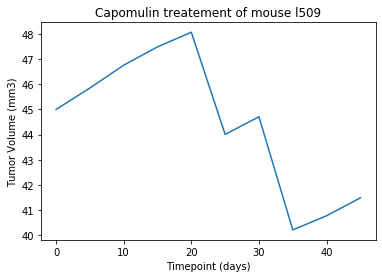

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_selected = "l509"
drug_regimen_chosen = "Capomulin"

# Slice data for selected drug and mouse
one_drug_mouse_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == drug_regimen_chosen) & (cleaned_df["Mouse ID"] == mouse_selected),:]

# Plot tumor vol vs time point
plt.plot(one_drug_mouse_df["Timepoint"],one_drug_mouse_df["Tumor Volume (mm3)"])
plt.title(f"{drug_regimen_chosen} treatement of mouse {mouse_selected}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

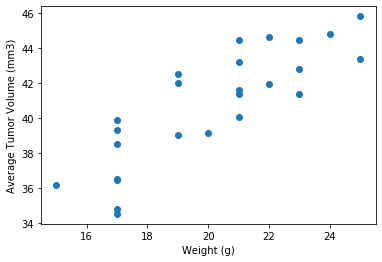

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_regimen_chosen = "Capomulin"

# Slice data for selected drug
one_drug_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == drug_regimen_chosen),:]

# Group data by weight and mouseID, calculate mean of data, grab only Tumor vol column, add index back as cols
avg_tum_by_weight = one_drug_df.groupby(["Weight (g)","Mouse ID"]).mean()["Tumor Volume (mm3)"].reset_index()

# Plot scatterplot
plt.scatter(avg_tum_by_weight["Weight (g)"], avg_tum_by_weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


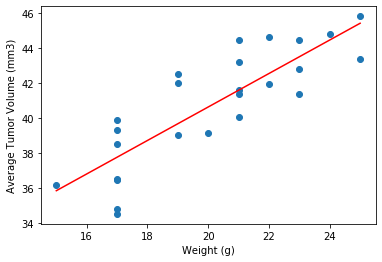

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# x axis
weight = avg_tum_by_weight["Weight (g)"]
# y axis
avg_tumor_vol = avg_tum_by_weight["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation = st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Use linear regression and grab all values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
# Create the values for the regression line
regress_values = weight * slope + intercept

# Plot scatter
plt.scatter(avg_tum_by_weight["Weight (g)"], avg_tum_by_weight["Tumor Volume (mm3)"])
# Plot the linear regression line
plt.plot(weight,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()